In [1]:
import numpy as np               
import pandas as pd              
import seaborn as sns             
from scipy import stats          
import calendar
from datetime import datetime    
import matplotlib.pyplot as plt  
%matplotlib inline  

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [5]:
sum(train['casual']+train['registered'] == train['count'])

10886

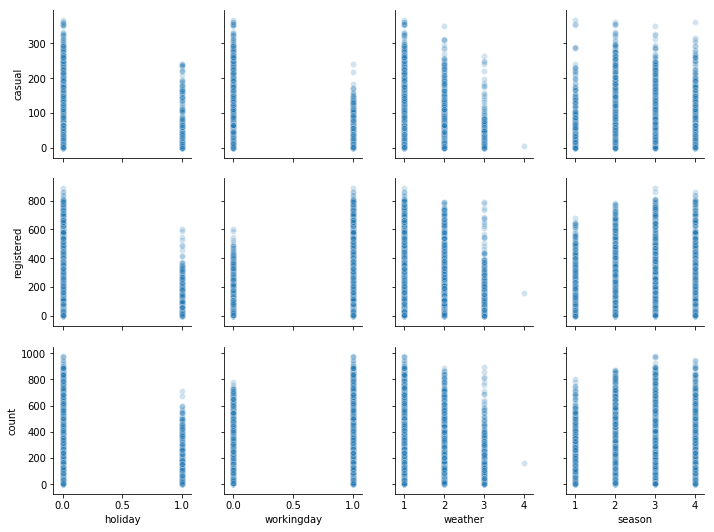

In [6]:
sns.pairplot(train,x_vars=["holiday","workingday","weather","season"],
                   y_vars=["casual","registered","count"], 
             plot_kws={'alpha': 0.2})
plt.savefig('pair1.jpg')

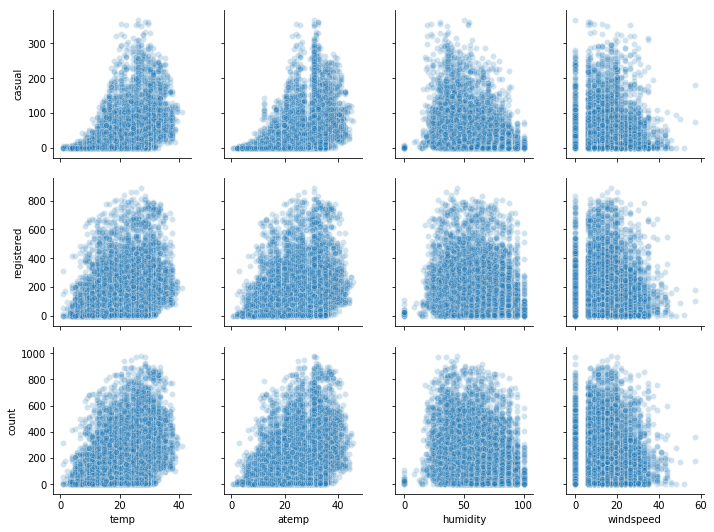

In [7]:
sns.pairplot(train,x_vars=["temp","atemp","humidity","windspeed"],
                   y_vars=["casual","registered","count"], 
             plot_kws={'alpha': 0.2})
plt.savefig('pair2.jpg')

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


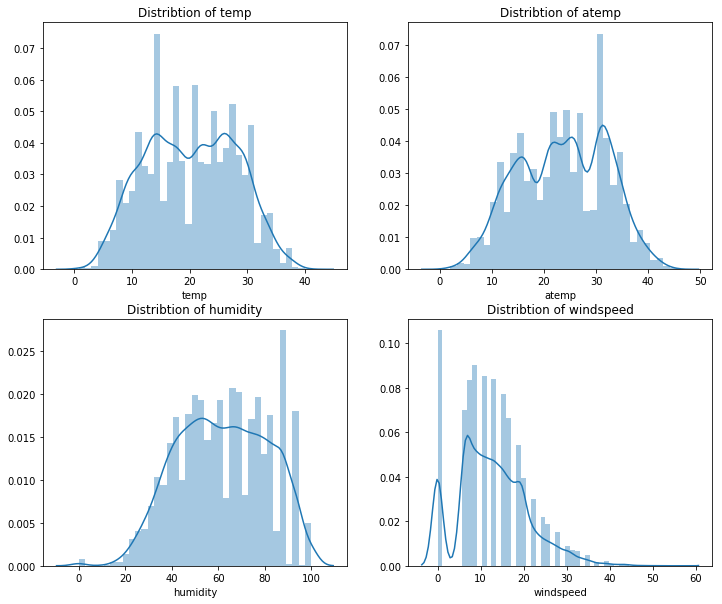

In [8]:
fig,axes = plt.subplots(2,2)
fig.set_size_inches(12,10)

sns.distplot(train['temp'],ax=axes[0,0])
sns.distplot(train['atemp'],ax=axes[0,1])
sns.distplot(train['humidity'],ax=axes[1,0])
sns.distplot(train['windspeed'],ax=axes[1,1])

axes[0,0].set(xlabel='temp',title='Distribtion of temp')
axes[0,1].set(xlabel='atemp',title='Distribtion of atemp')
axes[1,0].set(xlabel='humidity',title='Distribtion of humidity')
axes[1,1].set(xlabel='windspeed',title='Distribtion of windspeed')
plt.savefig('displot.jpg')

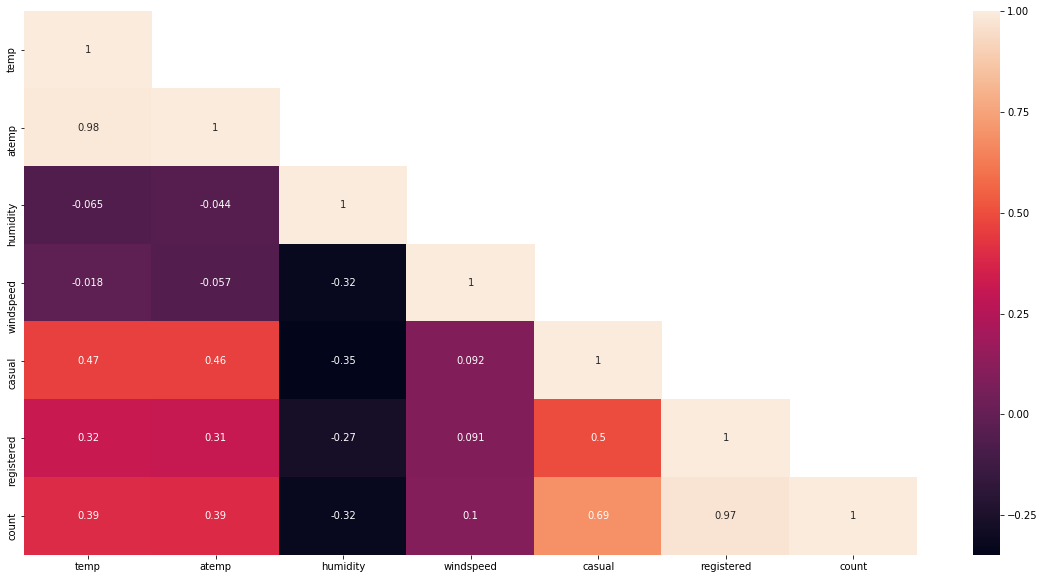

In [9]:
numeric=["temp","atemp","humidity","windspeed",
         "casual","registered","count"]
corrmask=train[numeric].corr()
mask=np.array(corrmask)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(20,10)

sns.heatmap(corrmask,mask=mask,vmax=1,annot=True)
plt.savefig('corrmask.jpg')

In [10]:
print('workingday:',sum(train['workingday']==1))
print('no workingday:',sum(train['workingday']==0))
print('holiday:',sum(train['holiday']==1))
print('no holiday:',sum(train['holiday']==0))

workingday: 7412
no workingday: 3474
holiday: 311
no holiday: 10575


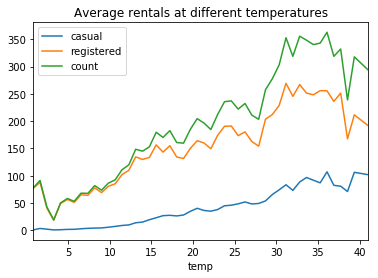

In [11]:
temp_rentals=train.groupby(["temp"],as_index=True).agg({"casual":"mean",
                                                        "registered":"mean",
                                                        "count":"mean"})

temp_rentals.plot(title="Average rentals at different temperatures")
plt.savefig('temp.jpg')

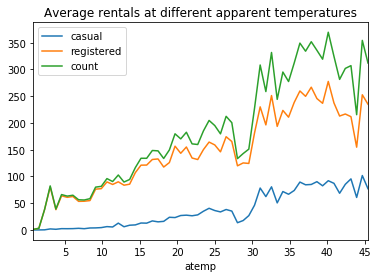

In [12]:
temp_rentals=train.groupby(["atemp"],as_index=True).agg({"casual":"mean",
                                                         "registered":"mean",
                                                         "count":"mean"})

temp_rentals.plot(title="Average rentals at different apparent temperatures")
plt.savefig('atemp.jpg')

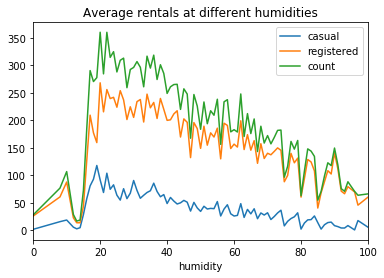

In [13]:
humidity_rentals=train.groupby(["humidity"],as_index=True).agg({"casual":"mean",
                                                                "registered":"mean",
                                                                "count":"mean"})

humidity_rentals.plot(title="Average rentals at different humidities")
plt.savefig('hum.jpg')

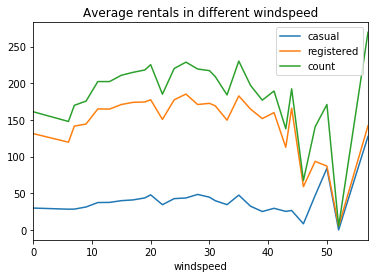

In [14]:
windspeed_rentals=train.groupby(["windspeed"],as_index=True).agg({"casual":"mean",
                                                                "registered":"mean",
                                                                "count":"mean"})
windspeed_rentals.plot(title="Average rentals in different windspeed")
plt.savefig('windspeed.jpg')

# Add time variables

In [15]:
train['datetime'] = pd.to_datetime(train['datetime'],errors='coerce')
train['date'] = train['datetime'].apply(lambda x: x.date())
train['year'] = train['datetime'].apply(lambda x: x.year)
train['month'] = train['datetime'].apply(lambda x: x.month)
train['weekday'] = train['datetime'].apply(lambda x: x.weekday())
train['hour'] = train['datetime'].apply(lambda x: x.hour).astype('int')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null object
year          10886 non-null int64
month         10886 non-null int64
weekday       10886 non-null int64
hour          10886 non-null int32
dtypes: datetime64[ns](1), float64(3), int32(1), int64(11), object(1)
memory usage: 1.4+ MB


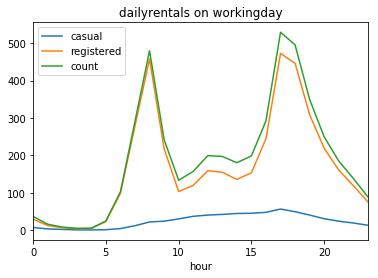

In [17]:
workingday_df=train[train['workingday']==1]
workingday_df = workingday_df.groupby(['hour'], as_index=True).agg({'casual':'mean',
                                                                    'registered':'mean',
                                                                    'count':'mean'})
workingday_df.plot(title="dailyrentals on workingday")
plt.savefig('workingday.jpg')

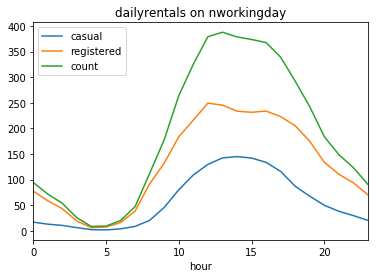

In [18]:
nworkingday_df=train[train['workingday']==0]
nworkingday_df = nworkingday_df.groupby(['hour'], as_index=True).agg({'casual':'mean',
                                                                      'registered':'mean',
                                                                      'count':'mean'})
nworkingday_df.plot(title="dailyrentals on nworkingday")
plt.savefig('nworkingday.jpg')

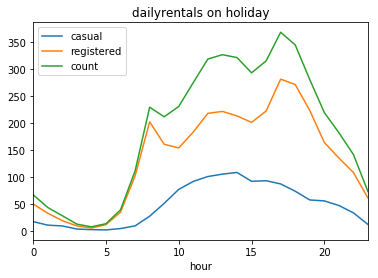

In [19]:
holiday_df=train[train['holiday']==1]
holiday_df = holiday_df.groupby(['hour'], as_index=True).agg({'casual':'mean',
                                                              'registered':'mean',
                                                              'count':'mean'})

holiday_df.plot(title="dailyrentals on holiday")
plt.savefig('holiday.jpg')

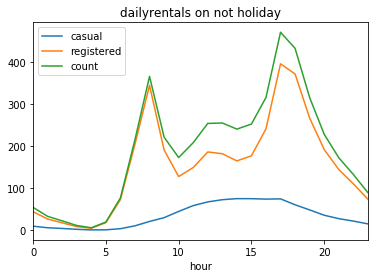

In [20]:
nholiday_df=train[train['holiday']==0]
nholiday_df = nholiday_df.groupby(['hour'], as_index=True).agg({'casual':'mean',
                                                                'registered':'mean',
                                                                'count':'mean'})
nholiday_df.plot(title="dailyrentals on not holiday")
plt.savefig('nholiday.jpg')

In [21]:
train.groupby(['month','year'])[['casual','registered']].sum()

casual  registered
month year                    
1     2011    2008       21544
      2012    5244       51088
2     2011    3776       29068
      2012    5521       60748
3     2011    7910       30825
      2012   17146       77620
4     2011   12229       38288
      2012   27584       89301
5     2011   15865       63848
      2012   25420       95014
6     2011   19600       70176
      2012   28974      101983
7     2011   26145       66703
      2012   24802       96967
8     2011   17580       65716
      2012   28290      101930
9     2011   18311       60793
      2012   27590      105835
10    2011   17159       62363
      2012   20928      106984
11    2011   10155       60734
      2012   15198       90353
12    2011    5079       56104
      2012    9621       89356

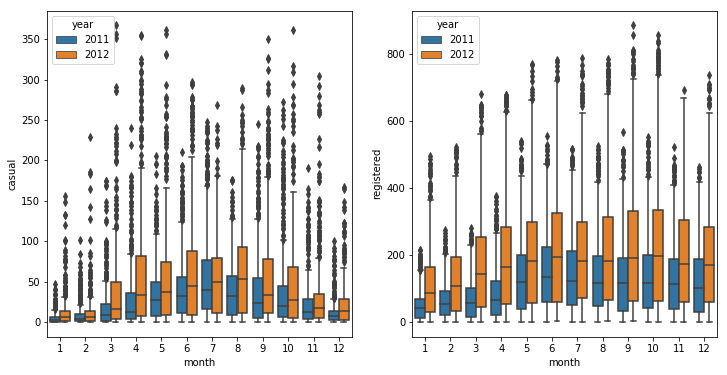

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(data=train,x="month",hue="year",y="casual")
plt.subplot(122)
sns.boxplot(data=train,x="month",hue="year",y="registered")
plt.savefig('month.jpg')
plt.show()

In [23]:
train.groupby(['season','year'])[['casual','registered']].sum()

casual  registered
season year                    
1      2011   13694       81437
       2012   27911      189456
2      2011   47694      172312
       2012   81978      286298
3      2011   62036      193212
       2012   80682      304732
4      2011   32393      179201
       2012   45747      286693

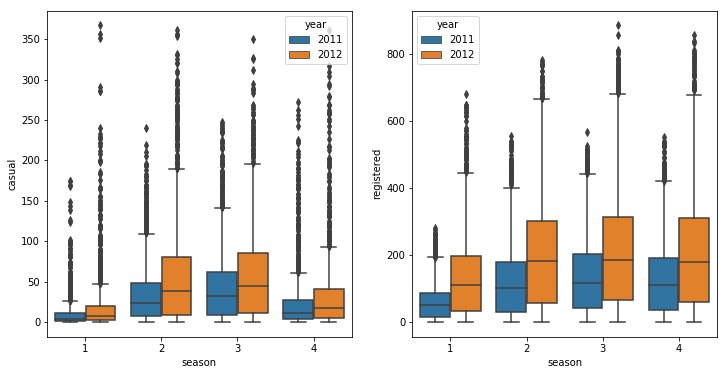

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(data=train,x='season',hue='year',y='casual')
plt.subplot(122)
sns.boxplot(data=train,x='season',hue='year',y='registered')
plt.savefig('season.jpg')
plt.show()

In [25]:
train.groupby(['weather','year'])[['casual','registered']].sum()

casual  registered
weather year                    
1       2011  114020      440794
        2012  175880      745369
2       2011   34770      148840
        2012   52476      271074
3       2011    7027       36528
        2012    7956       50578
4       2012       6         158

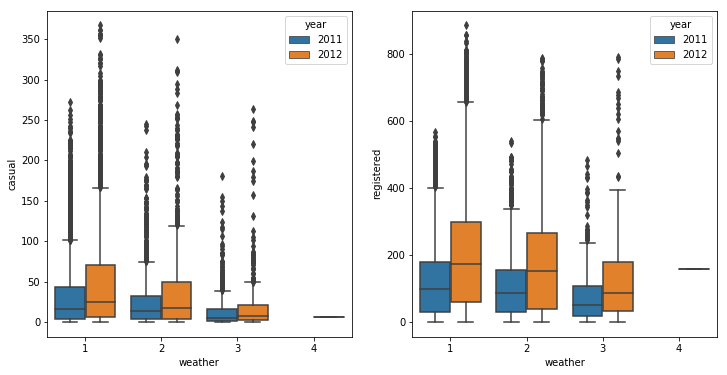

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(data=train,x='weather',hue='year',y='casual')
plt.subplot(122)
sns.boxplot(data=train,x='weather',hue='year',y='registered')
plt.savefig('weather.jpg')
plt.show()

# Bulid Model

In [27]:
dummies_month = pd.get_dummies(train['month'], prefix= 'month')
dummies_season = pd.get_dummies(train['season'], prefix= 'season')
dummies_weather = pd.get_dummies(train['weather'], prefix= 'weather')
dummies_year = pd.get_dummies(train['year'], prefix= 'year')

data=pd.concat([train,dummies_month,dummies_season,dummies_weather,dummies_year],axis=1)

yLabels=data['count']
dropFeatures = ['casual' , 'count' , 'datetime' , 
                'registered' , 'date' ,'season',
                'weather','month','year','windspeed']

dataTrain = data.drop(dropFeatures,axis=1)

In [28]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 29 columns):
holiday       10886 non-null int64
workingday    10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
weekday       10886 non-null int64
hour          10886 non-null int32
month_1       10886 non-null uint8
month_2       10886 non-null uint8
month_3       10886 non-null uint8
month_4       10886 non-null uint8
month_5       10886 non-null uint8
month_6       10886 non-null uint8
month_7       10886 non-null uint8
month_8       10886 non-null uint8
month_9       10886 non-null uint8
month_10      10886 non-null uint8
month_11      10886 non-null uint8
month_12      10886 non-null uint8
season_1      10886 non-null uint8
season_2      10886 non-null uint8
season_3      10886 non-null uint8
season_4      10886 non-null uint8
weather_1     10886 non-null uint8
weather_2     10886 non-null uint8
weather_3   

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from math import sqrt
import statsmodels.api as sm

In [30]:
X_train_ca, X_valid_ca, y_train_ca, y_valid_ca = train_test_split(dataTrain, 
                                    train['casual'], test_size=0.3, random_state=42)
X_train_re, X_valid_re, y_train_re, y_valid_re = train_test_split(dataTrain, 
                                    train['registered'], test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(dataTrain, 
                                    train['count'], test_size=0.3, random_state=42)

In [31]:
rfModel_ca = RandomForestRegressor(n_estimators=1000 , 
                                   oob_score=True, random_state = 42)
rfModel_ca.fit(X_train_ca , y_train_ca)

rfModel_re = RandomForestRegressor(n_estimators=1000 , 
                                   oob_score=True, random_state = 42)
rfModel_re.fit(X_train_re , y_train_re)

rfModel = RandomForestRegressor(n_estimators=1000 , 
                                oob_score=True, random_state = 42)
rfModel.fit(X_train , y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [32]:
preds_train_ca = rfModel_ca.predict( X = X_train_ca)
rmsle_casual_train = sqrt(mean_squared_log_error(y_train_ca, preds_train_ca))

preds_valid_ca = rfModel_ca.predict( X = X_valid_ca)
rmsle_casual_valid = sqrt(mean_squared_log_error(y_valid_ca, preds_valid_ca))
print('Casual train rmsle : %.5f, valid rmsle : %.5f' %(rmsle_casual_train,
                                                        rmsle_casual_valid))

preds_train_re = rfModel_re.predict( X = X_train_re)
rmsle_registered_train = sqrt(mean_squared_log_error(y_train_re, preds_train_re))

preds_valid_re = rfModel_re.predict( X = X_valid_re)
rmsle_registered_valid = sqrt(mean_squared_log_error(y_valid_re, preds_valid_re))
print('Registered train rmsle : %.5f,valid rmsle : %.5f' %(rmsle_registered_train, 
                                                           rmsle_registered_valid))

Casual train rmsle : 0.23984, valid rmsle : 0.52136
Registered train rmsle : 0.14623,valid rmsle : 0.31772


In [33]:
preds_train = rfModel.predict( X = X_train)
rmsle_count_train = sqrt(mean_squared_log_error(y_train, preds_train))

preds_valid = rfModel.predict( X = X_valid)
rmsle_count_valid = sqrt(mean_squared_log_error(y_valid, preds_valid))
print('Count train rmsle : %.5f, valid rmsle : %.5f'  %(rmsle_count_train,
                                                        rmsle_count_valid))

Count train rmsle : 0.14909, valid rmsle : 0.32986


In [34]:
preds_train_merge_count = preds_train_re + preds_train_ca
preds_valid_merge_count = preds_valid_re + preds_valid_ca
rmsle_merge_train = sqrt(mean_squared_log_error(y_train,preds_train_merge_count))
rmsle_merge_valid = sqrt(mean_squared_log_error(y_valid,preds_valid_merge_count))

print('(merge) Count train rmsle : %.5f, valid rmsle : %.5f'%(rmsle_merge_train,
                                                              rmsle_merge_valid))

(merge) Count train rmsle : 0.14562, valid rmsle : 0.32071


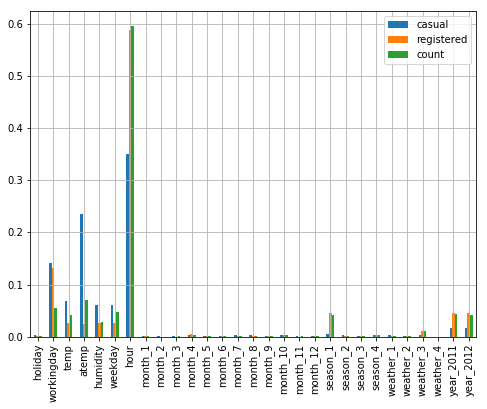

In [36]:
rf_dict={'casual':rfModel_ca.feature_importances_.round(3),
         'registered':rfModel_re.feature_importances_.round(3),
         'count':rfModel.feature_importances_.round(3)}
pd.DataFrame(rf_dict,X_train_ca.columns).plot(kind='bar',figsize=(8,6))
plt.grid()

In [37]:
pd.DataFrame(rf_dict,X_train_ca.columns)

,casual,registered,count
holiday,0.004,0.001,0.002
workingday,0.141,0.132,0.055
temp,0.068,0.027,0.042
atemp,0.236,0.025,0.070
humidity,0.060,0.026,0.028
weekday,0.061,0.027,0.047
hour,0.350,0.587,0.595
month_1,0.001,0.001,0.001
month_2,0.002,0.000,0.000
month_3,0.001,0.000,0.001
